In [1]:
from torch.utils.data.dataloader import DataLoader
import os
import time
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
colnames = ['ID','diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension','radius se','texture se','perimeter se','area se','smoothness se','compactness se','concavity se','concave points se','symmetry se','fractal dimension se',' worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']
df = pd.read_csv("/Users/ruthwetters/Downloads/wdbc.data",names=colnames)
df.head()

,ID,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


encoding target variable

In [3]:
df = df.replace({"diagnosis":  {"M":1,"B":0}})

In [4]:
df.describe()

,ID,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Can search for null values and check dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius                   569 non-null    float64
 3   texture                  569 non-null    float64
 4   perimeter                569 non-null    float64
 5   area                     569 non-null    float64
 6   smoothness               569 non-null    float64
 7   compactness              569 non-null    float64
 8   concavity                569 non-null    float64
 9   concave points           569 non-null    float64
 10  symmetry                 569 non-null    float64
 11  fractal dimension        569 non-null    float64
 12  radius se                569 non-null    float64
 13  texture se               569 non-null    float64
 14  perimeter se             5

Since all variables are numeric, can look at distribution to find skew

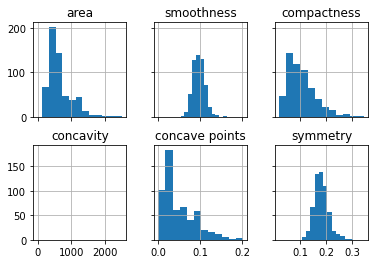

In [6]:
#need to split this by target variable also
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
m=5
for i in range(2):
    for j in range(3):

        df.hist(column = df.columns[m], bins = 12, ax=ax[i,j], figsize=(20, 18))
        m+=1

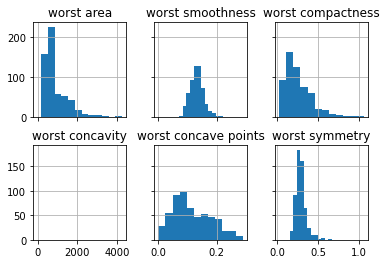

In [7]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
m=25
for i in range(2):
    for j in range(3):

        df.hist(column = df.columns[m], bins = 12, ax=ax[i,j], figsize=(20, 18))
        m+=1

These show that a number of variables are right-skewed - can apply log transformations to see if that helps. In particular, all standard error variables (ending in se) are skewed.

In [8]:
df['radius se'] = np.log(df['radius se'])
df['smoothness se'] = np.log(df['smoothness se'])
df['compactness se'] = np.log(df['compactness se'])

Tried pearson and spearman correlation to find correlated variables, which had very similar results: a strong correlation between radius, perimeter and area.

In [9]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [10]:
print(df.columns)

Index(['ID', 'diagnosis', 'radius', 'texture', 'smoothness', 'compactness',
       'concavity', 'concave points', 'symmetry', 'fractal dimension',
       'radius se', 'texture se', 'perimeter se', 'area se', 'smoothness se',
       'compactness se', 'concavity se', 'concave points se', 'symmetry se',
       'fractal dimension se', 'worst texture', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')


Text(0.5, 1.0, 'Correlation On diagnosis')

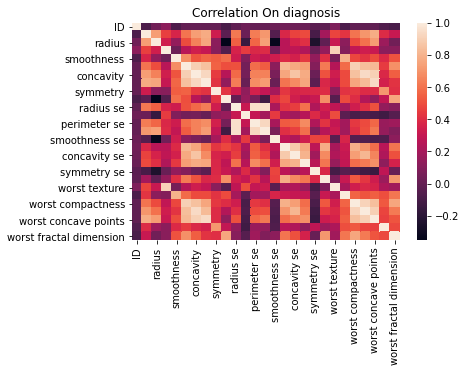

In [11]:
plt.figure(1)
sns.heatmap(df.corr(method='spearman'))
plt.title('Correlation On diagnosis')

I dropped highly correlated variables to see whether dimensionality reduction would make a diffference to my results. I dropped six variables: mean area, mean perimeter, area se, perimeter se, worst area and worst perimeter, as these are well represented by the radius values.

Outlier detection: used Isolation Forest (and split temporarily into test and train for this purpose) but did not identify any outliers.

In [12]:
X = df.iloc[:,2:]
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
yhat

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1

In [15]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)

In [16]:
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [17]:
scaled_features_df

,ID,diagnosis,radius,texture,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,...,concave points se,symmetry se,fractal dimension se,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.236405,1.297676,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,0.660820,1.148757,0.907083,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.297676,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,0.260162,-0.805450,-0.099444,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.297676,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.424827,0.237036,0.293559,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,1.297676,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,1.115007,4.732680,2.047511,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.297676,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.144205,-0.361092,0.499328,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,1.297676,2.110995,0.721473,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,2.067178,-1.138416,0.167980,0.117700,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,-0.235730,1.297676,1.704854,2.085134,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,0.808431,-0.189161,-0.490556,2.047399,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,-0.235727,1.297676,0.702284,2.045574,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.612157,-0.891416,0.036727,1.374854,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,-0.235725,1.297676,1.838341,2.336457,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,0.785721,0.326634,0.904057,2.237926,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [18]:
scaled_features_df.to_csv("/Users/ruthwetters/Documents/scaled.csv")